

**선형 보간법 요약**

-  **이분법과 비교:**
-  이분법은 함수의 부호 변화를 이용해 구간을 줄여나가며 근을 찾는 반면,
-  선형 보간법은 함수의 특성이 반영되지 못하여 근에 접근하는 속도가 느릴 수 있는 이분법을 개선하기 위해 사용됩니다.
-  **선형 보간법의 개념:**
-  함수가 두 점을 지나는 직선으로 근을 찾는 방법입니다.
-  즉, 두 점 $(x_l ,f(x_l ))$ 와 $(x_u ,f(x_u ))$ 를 지나는 직선을 사용하여 근을 추정합니다.
-  근에 가까운 점이 $f(x)$ 에 가깝다고 가정합니다.

**선형 보간법 유도**

-  유도 과정에서 두 점 사이의 직선을 이용하여 근을 찾는 공식이 나타납니다.
-  두 점 $(x_l ,f(x_l ))$ 와 $(x_u ,f(x_u ))$ 사이에 있는 근을 찾는 $x_r$ 는 다음과 같이 계산됩니다.

 $x_r =x_u -\frac{f(x_u )\times (x_l -x_u )}{f(x_l )-f(x_u )}$ ​


**예제**

-  예제에서는 낙하산 병 문제를 해결하기 위해 선형 보간법을 적용하고 있습니다.
-  주어진 함수 $f(c)$ 를 사용하여 두 점에서의 함수 값을 계산하고, 이를 통해 근을 추정합니다.
-  이 과정을 통해 항력 계수를 찾고 있습니다.

**선형 보간법의 절차**

1.  **초기 값 설정:**

-  $x_l$ 과 $x_u$ 를 선택하여 함수 값을 계산합니다.

1.  **근 계산:**

-  위에서 유도한 공식을 사용하여 근을 계산합니다.

1.  **오차 확인 및 반복:**

-  근이 수렴할 때까지 위 과정을 반복합니다.

In [1]:
% 초기 변수 설정
m = 68.1;  % 질량 (kg)
g = 9.81;  % 중력 가속도 (m/s^2)
v = 40;    % 속도 (m/s)
t = 10;    % 시간 (s)
es = 0.5;  % 허용 오차

% 속도 함수 정의
v_func = @(c) (g * m / c) * (1 - exp(-c * t / m)) - v;

% 선형 보간법을 위한 초기 구간 설정
xl = 12;
xu = 16;
ea = 100;  % 초기 오차
xr_old = xl;

% 결과 저장을 위한 배열
iteration = 0;
xr_values = [];

% 선형 보간법 수행
while ea > es
    % f(xl)와 f(xu) 계산
    fl = v_func(xl);
    fu = v_func(xu);

    % 새로운 근 계산
    xr = xu - fu * (xl - xu) / (fl - fu);

    % 상대 오차 계산
    if xr ~= 0
        ea = abs((xr - xr_old) / xr) * 100;
    end
    xr_old = xr;

    % 새로운 구간 설정
    if v_func(xr) * fl < 0
        xu = xr;
    else
        xl = xr;
    end

    % 근의 값을 저장
    iteration = iteration + 1;
    xr_values(iteration) = xr;
end

% 최종 결과 출력
fprintf('항력 계수 c = %.4f\n', xr);

항력 계수 c = 14.8026


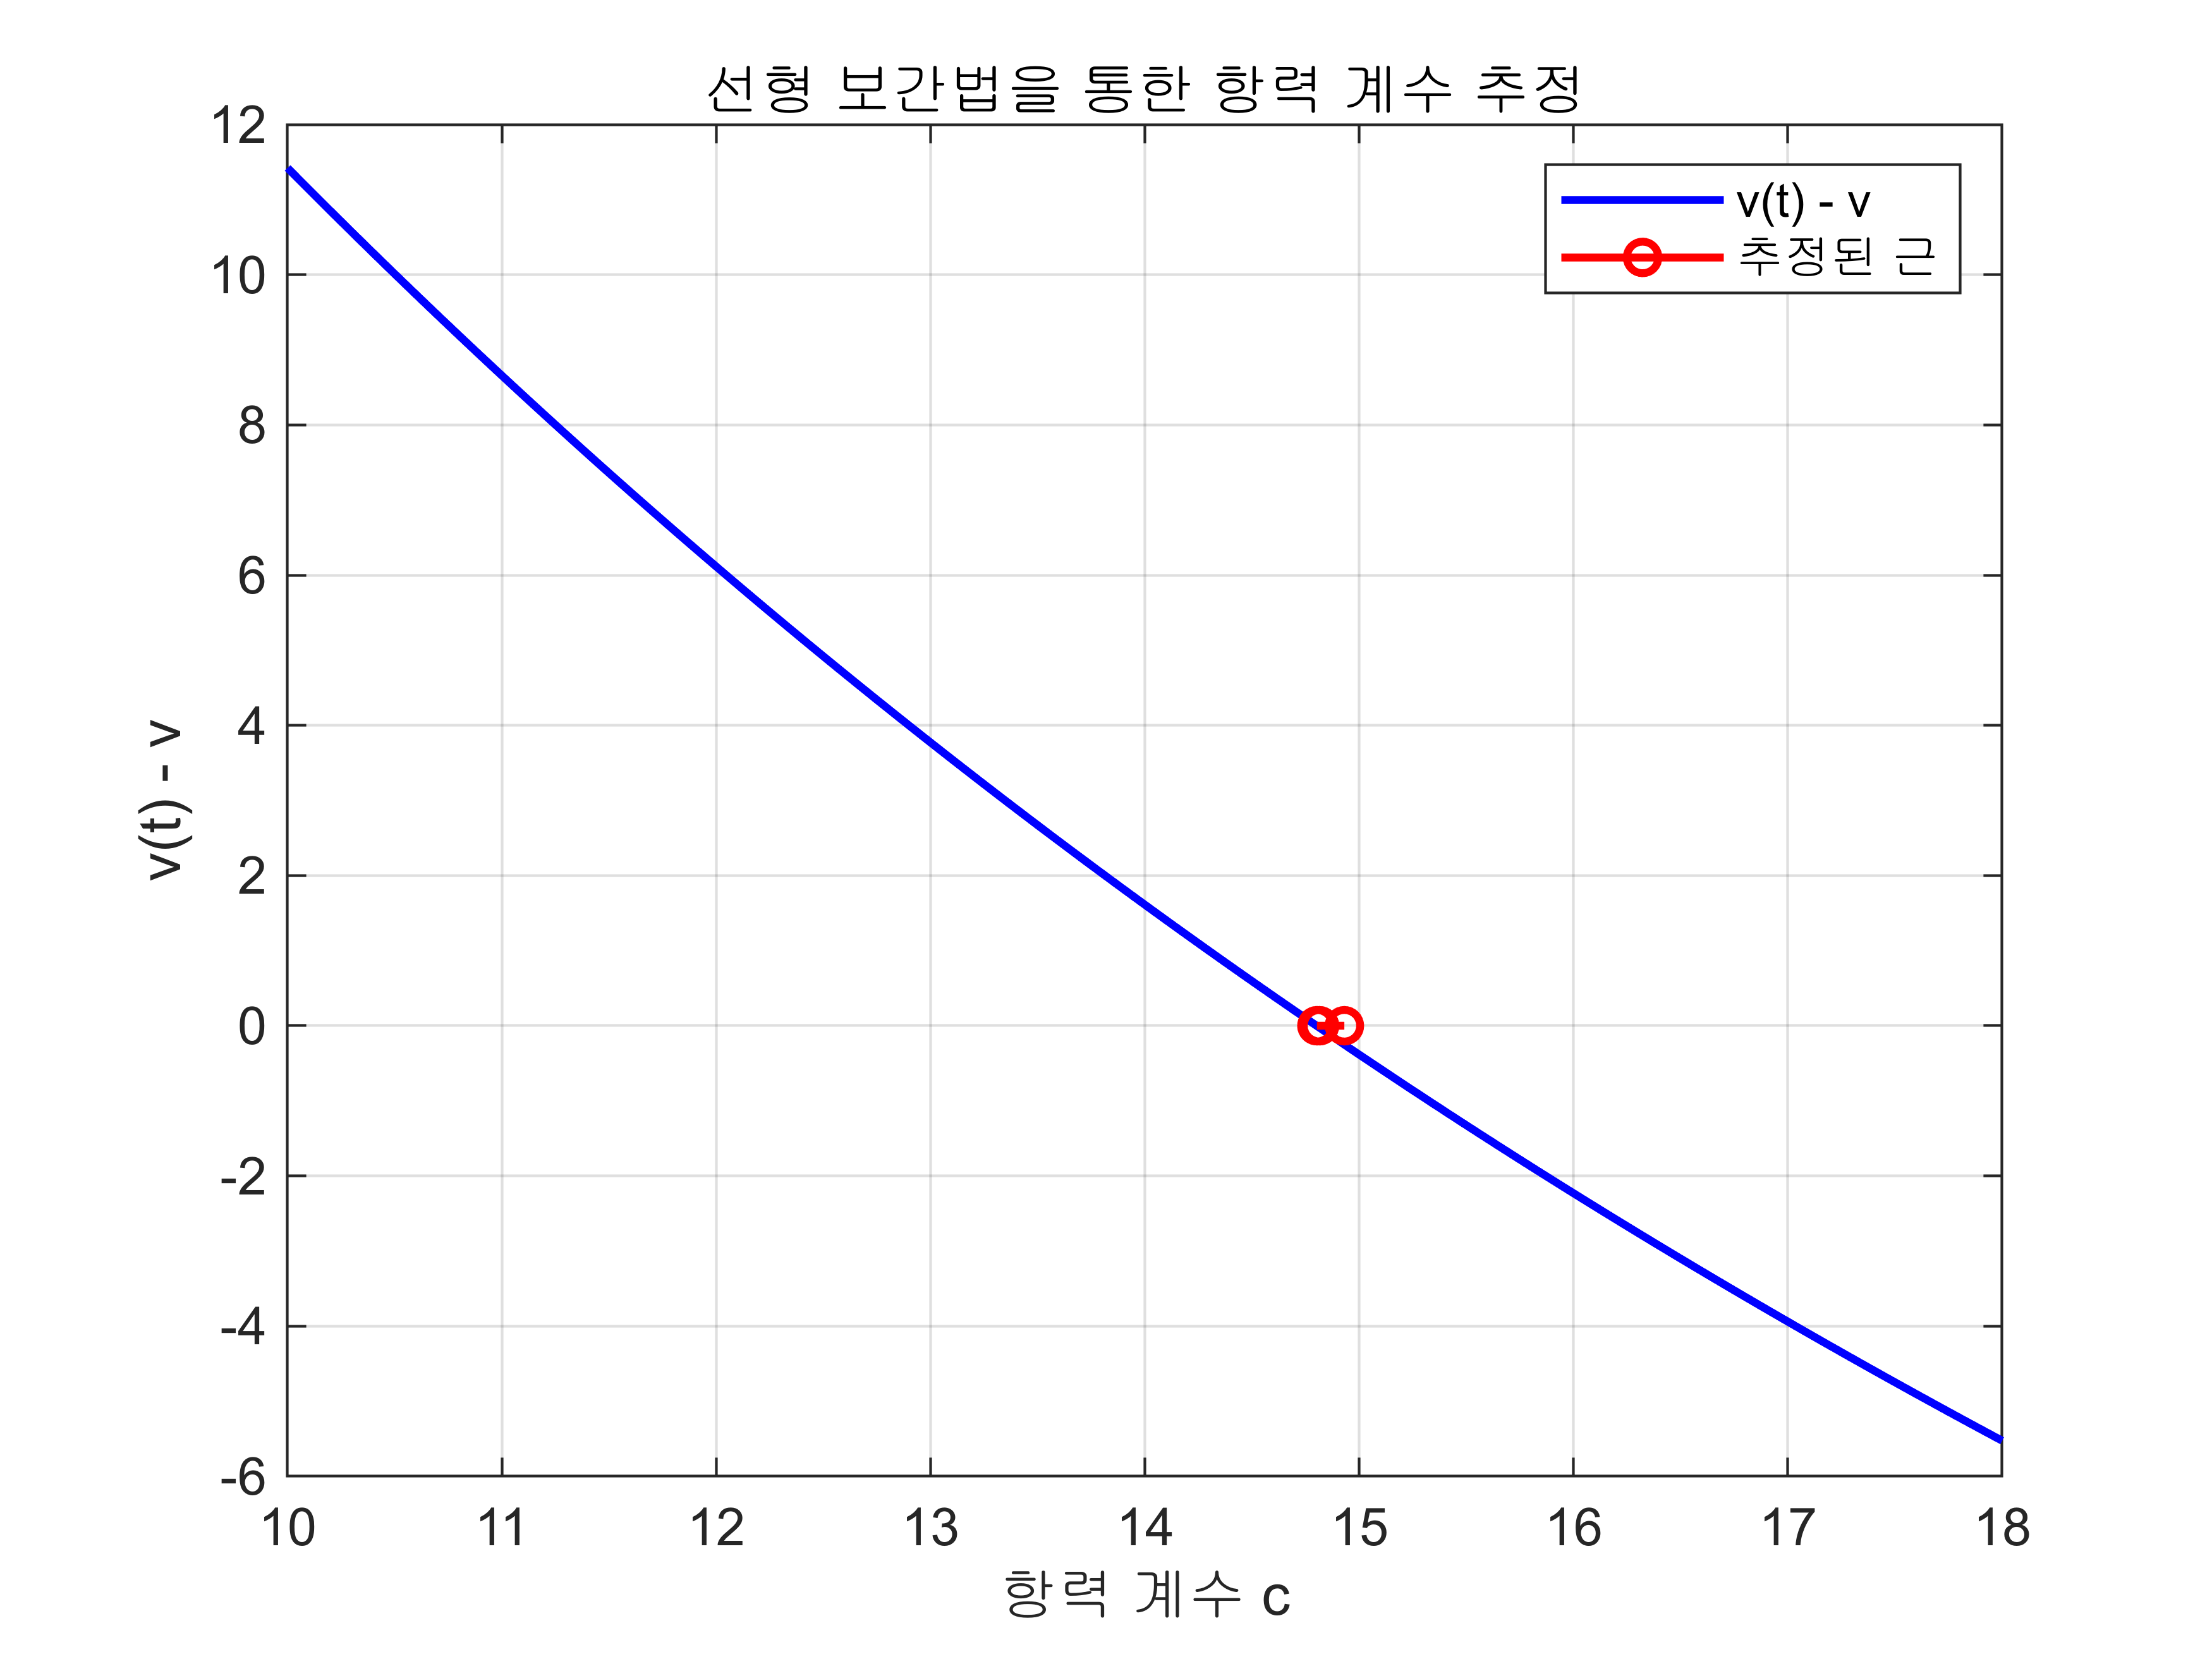

In [2]:

% 시각화
c_values = linspace(10, 18, 100); % c의 범위 설정
v_values = arrayfun(v_func, c_values);

figure;
plot(c_values, v_values, 'b-', 'LineWidth', 1.5); % 함수 그래프
hold on;
plot(xr_values, zeros(size(xr_values)), 'ro-', 'LineWidth', 1.5); % 근의 추정치
xlabel('항력 계수 c');
ylabel('v(t) - v');
title('선형 보간법을 통한 항력 계수 추정');
legend('v(t) - v', '추정된 근');
grid on;

In [3]:
%% 초기화
x_true = 14.801136;
v = 40;
t = 10;
m = 68.1;
g = 9.81;
err_s = 0.5e-2;

func = @(c) g.*m./c .* (1 - exp(-c.*t./m)) - v;

x = [12, 16]; % 초기 구간
x_new = mean(x); % 이분법 시작 시점에서의 추정치
x_old = x(1); % 초기화: x_old를 구간의 왼쪽 끝으로 설정

iter = 0; % 반복 횟수
xr_values = []; % 추정치 저장을 위한 배열
errors = []; % 오차 저장을 위한 배열

%% 이분법 실행 (6번 반복)
for iter = 1:6
    func_value = func(x);  % 현재 구간 끝점에서 함수값 계산

    % 근 교체
    x_old = x_new;
    x_new = mean(x); % 이분법: 구간의 중점 계산
    xr_values = [xr_values, x_new]; % 추정치 저장
    err_a = abs((x_new - x_old) / (x_new)) * 100; % 상대 오차 계산
    err_t = abs((x_new - x_true) / (x_true)) * 100; % 참 상대 오차 계산

    % 오차 저장
    errors = [errors; iter, x_new, err_a, err_t];

    f_r = func(x_new);
    fprintf("iter : %d, root : %6.4f, err : %8.6f\n", iter, x_new, err_a);

    % 구간 변경
    f_product = func_value(1) * f_r;
    if f_product < 0
        x(2) = x_new; % 구간의 오른쪽 끝을 중점으로 변경
    else
        x(1) = x_new; % 구간의 왼쪽 끝을 중점으로 변경
    end
end

iter : 1, root : 14.0000, err : 0.000000
iter : 2, root : 15.0000, err : 6.666667
iter : 3, root : 14.5000, err : 3.448276
iter : 4, root : 14.7500, err : 1.694915
iter : 5, root : 14.8750, err : 0.840336
iter : 6, root : 14.8125, err : 0.421941


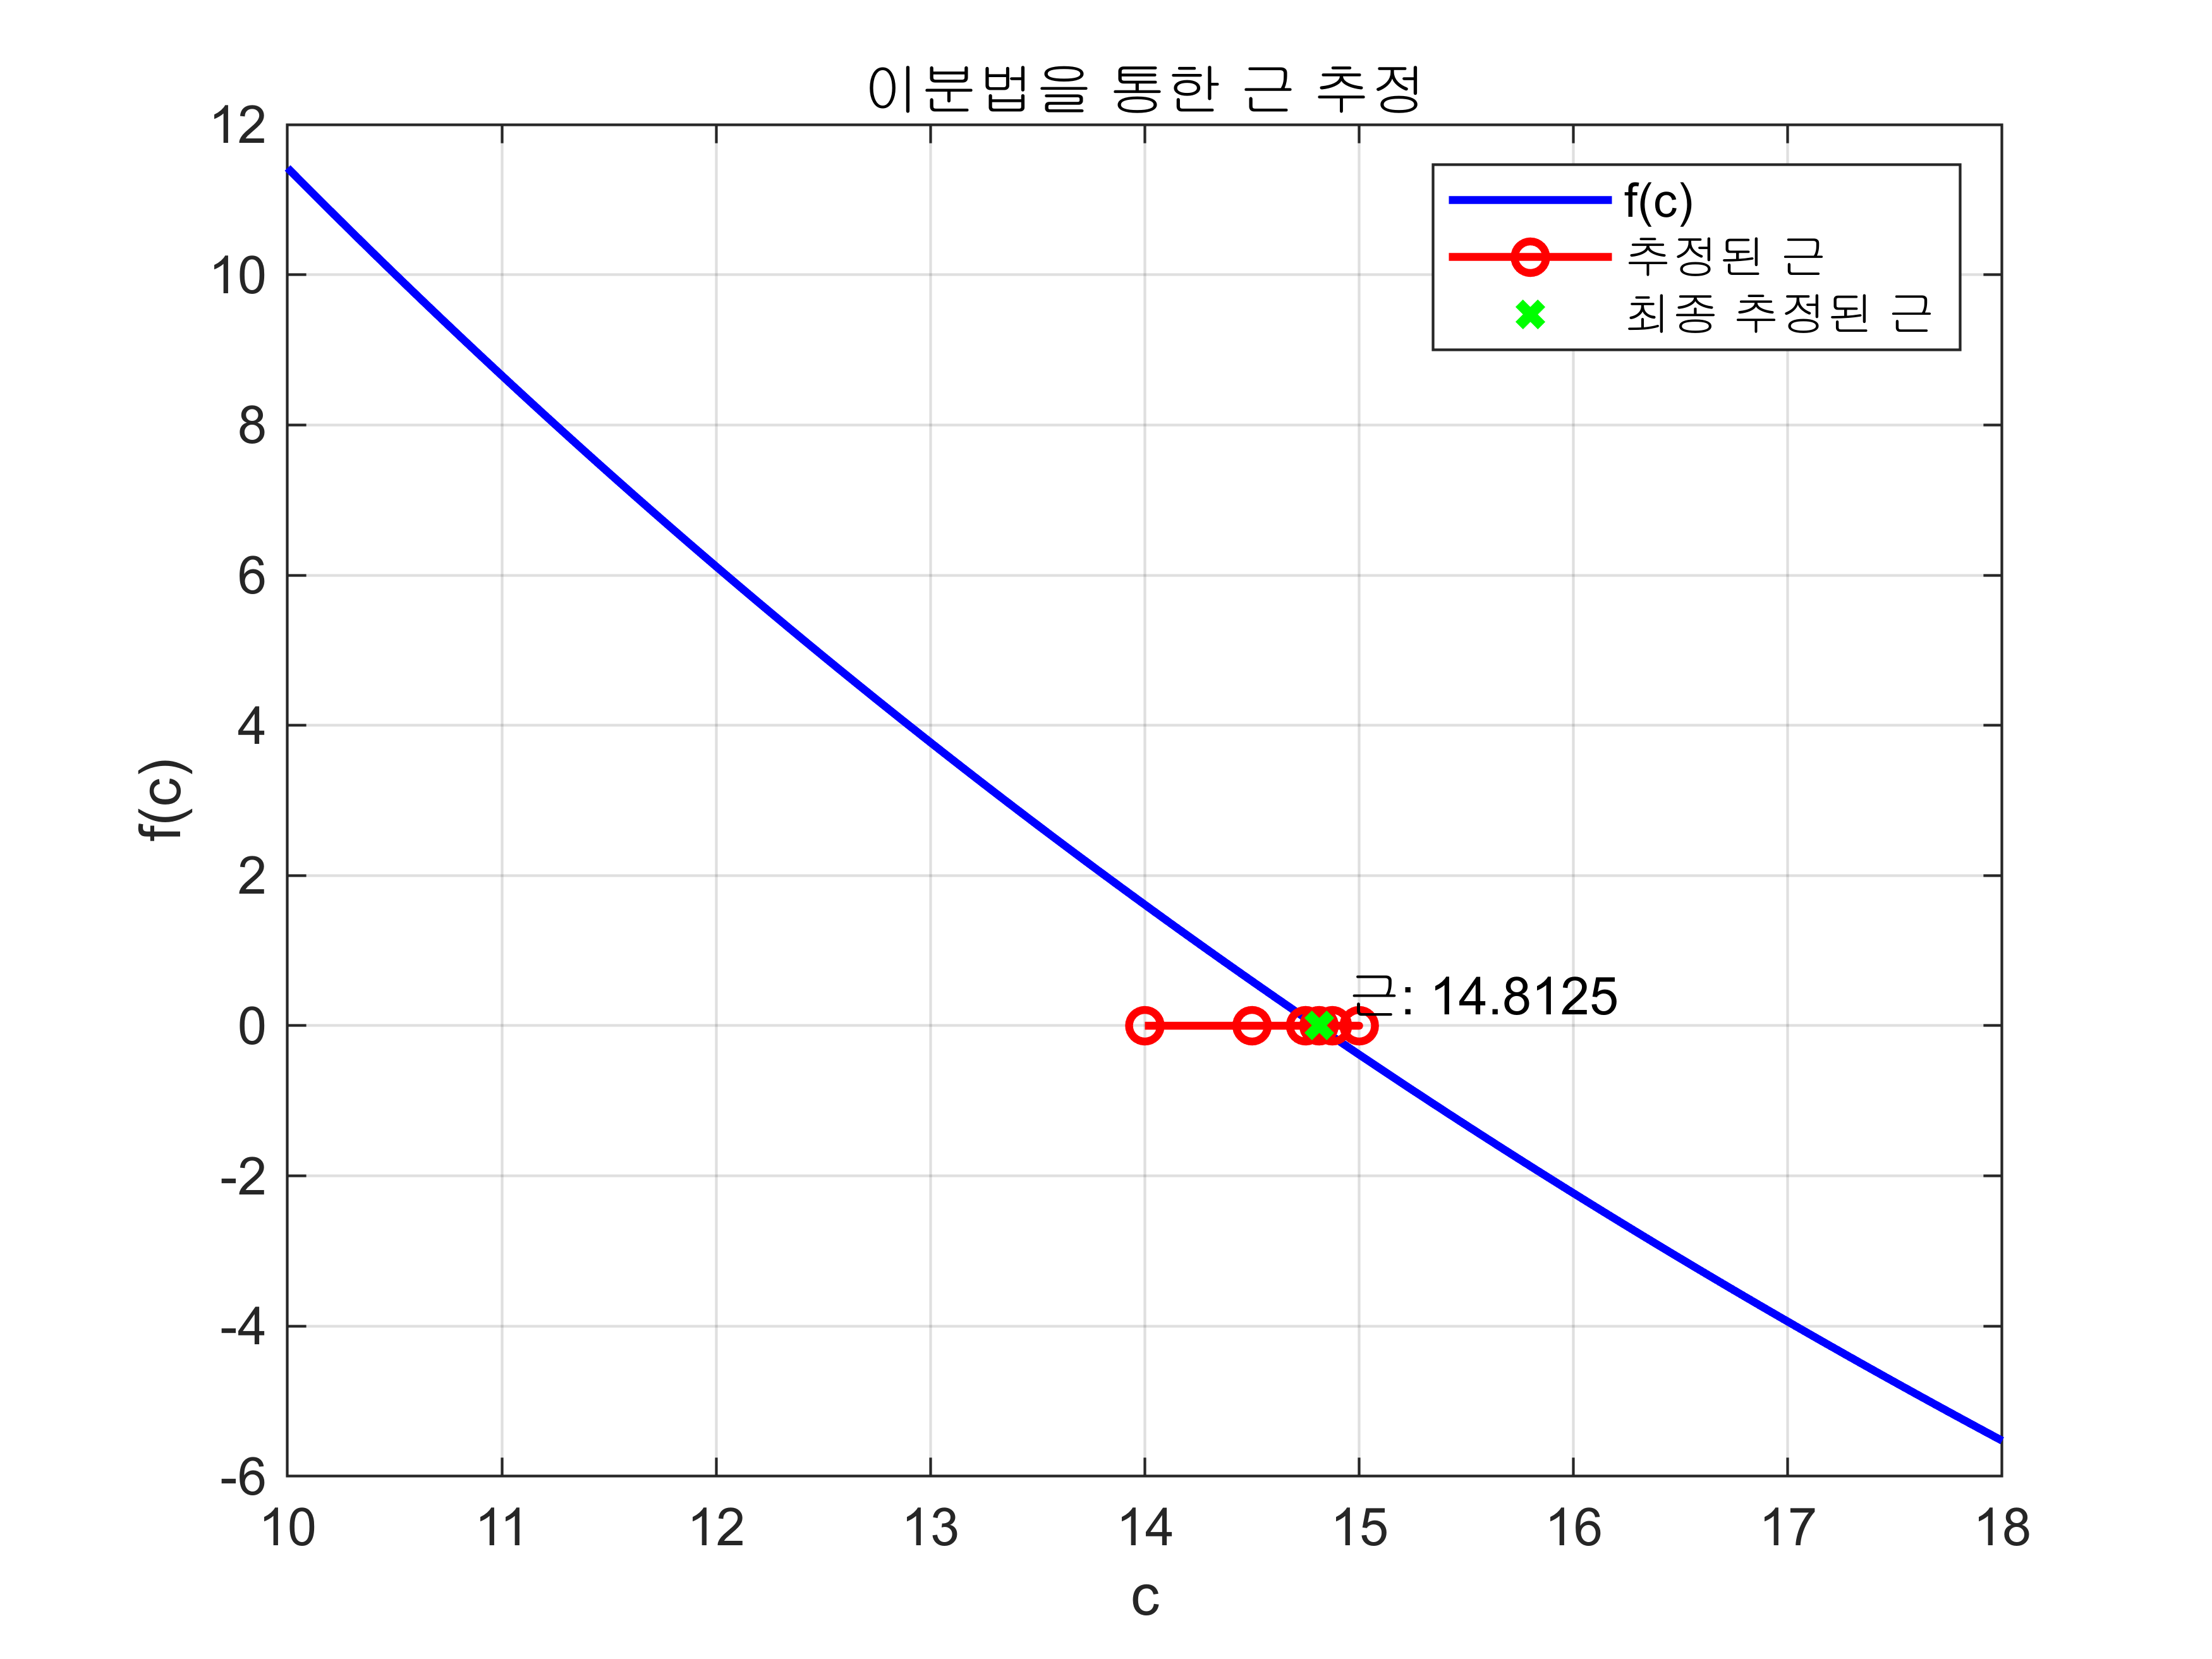

In [4]:

% 결과 시각화
c_values = linspace(10, 18, 100);
v_values = arrayfun(func, c_values);

figure;
plot(c_values, v_values, 'b-', 'LineWidth', 1.5); % 함수 그래프
hold on;
plot(xr_values, zeros(size(xr_values)), 'ro-', 'LineWidth', 1.5); % 추정된 근
scatter(xr_values(end), 0, 'gx', 'LineWidth', 2); % 최종 추정된 근 표시
text(xr_values(end), 0, sprintf('  근: %.4f', xr_values(end)), 'VerticalAlignment', 'bottom', 'HorizontalAlignment', 'left', 'Color', 'black');
xlabel('c');
ylabel('f(c)');
title('이분법을 통한 근 추정');
legend('f(c)', '추정된 근', '최종 추정된 근');
grid on;

In [5]:

% 오차 표 생성 및 출력
error_table = array2table(errors, 'VariableNames', {'Iteration', 'x_new', 'Relative_Error', 'True_Relative_Error'});
disp(error_table);

    Iteration    x_new     Relative_Error    True_Relative_Error
    _________    ______    ______________    ___________________
        1            14             0               5.4127      
        2            15        6.6667               1.3436      
        3          14.5        3.4483               2.0345      
        4         14.75        1.6949              0.34549      
        5        14.875       0.84034              0.49904      
        6        14.812       0.42194             0.076778

In [6]:

fprintf('최종 추정된 근: %.4f\n', x_new);

최종 추정된 근: 14.8125


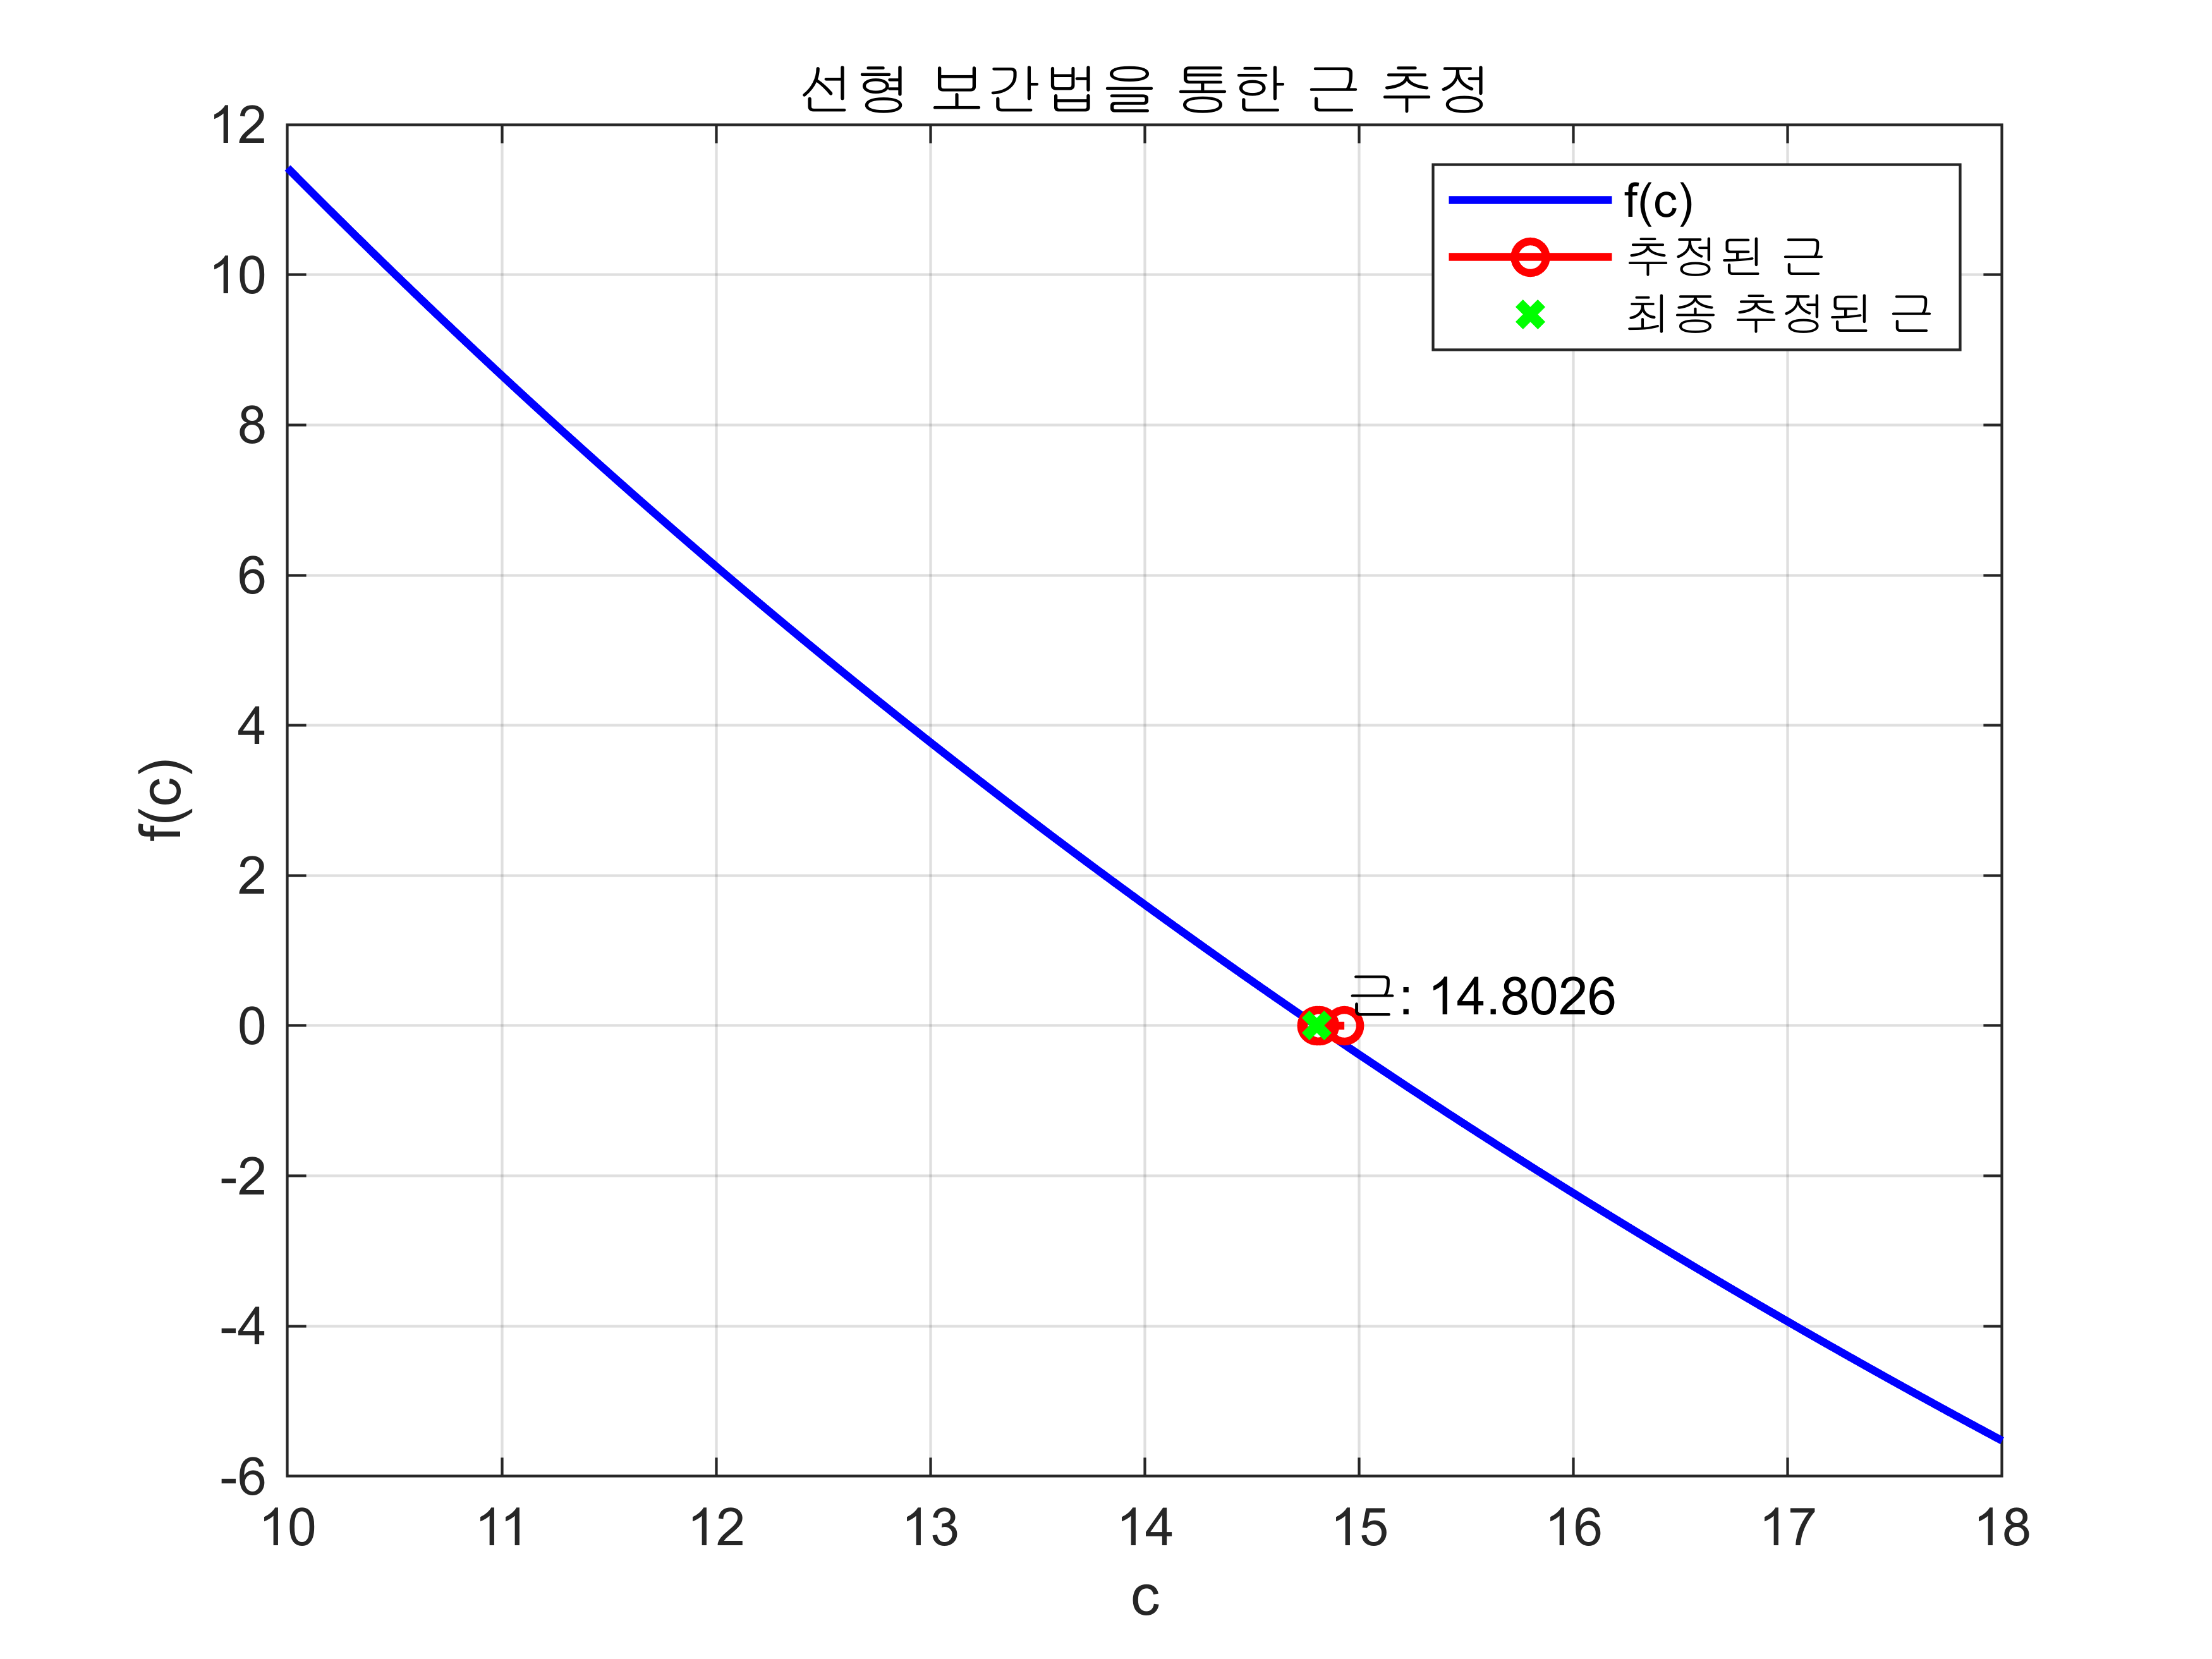

In [7]:
%% 초기화
x_true = 14.801136;
v = 40;
t = 10;
m = 68.1;
g = 9.81;
err_s = 0.5e-2;

func = @(c) g.*m./c .* (1 - exp(-c.*t./m)) - v;

x = [12, 16]; % 초기 구간
x_new = x(1);
x_old = x(2);

iter = 0; % 반복 횟수
xr_values = []; % 추정치 저장을 위한 배열
errors = []; % 오차 저장을 위한 배열

%% 선형보간법 실행
while true
    iter = iter + 1;
    func_value = func(x);  % 'f' 대신 'func_value'로 변수명 변경

    % 근 교체
    x_old = x_new;
    x_new = x(2) - (func_value(2) * (x(1) - x(2))) / (func_value(1) - func_value(2));
    xr_values = [xr_values, x_new]; % 추정치 저장
    err_a = abs((x_new - x_old) / (x_new)); % 상대 오차 계산
    err_t = abs((x_new - x_true) / (x_true)); % 참 상대 오차 계산

    % 오차 저장
    errors = [errors; iter, x_new, err_a, err_t];

    f_r = func(x_new);
    if (err_a <= err_s) || (f_r == 0), break; end % 허용 오차 확인

    % 구간 변경
    if func_value(1) * f_r < 0
        x(2) = x_new;
    else
        x(1) = x_new;
    end
end

% 결과 시각화
c_values = linspace(10, 18, 100);
v_values = arrayfun(func, c_values);

figure;
plot(c_values, v_values, 'b-', 'LineWidth', 1.5); % 함수 그래프
hold on;
plot(xr_values, zeros(size(xr_values)), 'ro-', 'LineWidth', 1.5); % 추정된 근
scatter(xr_values(end), 0, 'gx', 'LineWidth', 2); % 최종 추정된 근 표시
text(xr_values(end), 0, sprintf('  근: %.4f', xr_values(end)), 'VerticalAlignment', 'bottom', 'HorizontalAlignment', 'left', 'Color', 'black');
xlabel('c');
ylabel('f(c)');
title('선형 보간법을 통한 근 추정');
legend('f(c)', '추정된 근', '최종 추정된 근');
grid on;

In [8]:

% 오차 표 생성 및 출력
error_table = array2table(errors, 'VariableNames', {'Iteration', 'x_new', 'Relative_Error', 'True_Relative_Error'});
disp(error_table);

    Iteration    x_new     Relative_Error    True_Relative_Error
    _________    ______    ______________    ___________________
        1        14.931          0.1963           0.0087651     
        2        14.815       0.0078159          0.00094182     
        3        14.803      0.00084062          0.00010112

In [9]:

fprintf('최종 추정된 근: %.4f\n', x_new);

최종 추정된 근: 14.8026



<p style="text-align:left">
   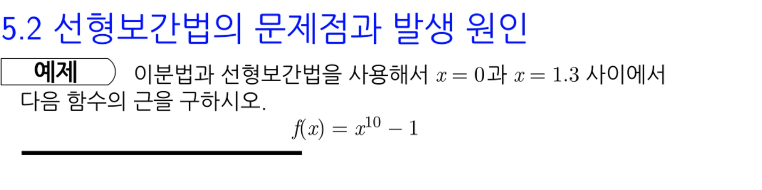
</p>


In [10]:
%% 초기화
myFunction = @(x) x^10 - 1; % 주어진 함수
err_s = 0.5e-5; % 허용 오차

%% 이분법
x_bi = [0, 1.3]; % 초기 구간
iter_bi = 0; % 반복 횟수
xr_values_bi = []; % 이분법 추정치 저장을 위한 배열
errors_bi = []; % 이분법 결과 저장을 위한 배열

while true
    iter_bi = iter_bi + 1;
    xr = mean(x_bi); % 구간의 중점 계산
    xr_values_bi = [xr_values_bi, xr]; % 추정치 저장
    f_r = myFunction(xr);

    % 상대 오차 계산
    if iter_bi > 1
        err_a_bi = abs((xr - xr_values_bi(end-1)) / xr) * 100;
    else
        err_a_bi = NaN; % 첫 번째 반복에서는 상대 오차 없음
    end
    err_t_bi = abs((xr - 1) / 1) * 100; % 실제 근이 1이므로

    % 결과 저장
    errors_bi = [errors_bi; x_bi(1), x_bi(2), xr, err_a_bi, err_t_bi];

    if abs(f_r) < err_s || err_a_bi < err_s % 종료 조건
        break;
    end

    % 구간 변경
    if myFunction(x_bi(1)) * f_r < 0
        x_bi(2) = xr; % 구간의 오른쪽 끝을 중점으로 변경
    else
        x_bi(1) = xr; % 구간의 왼쪽 끝을 중점으로 변경
    end
end

%% 선형보간법
x_lin = [0, 1.3]; % 초기 구간
iter_lin = 0; % 반복 횟수
xr_values_lin = []; % 선형보간법 추정치 저장을 위한 배열
errors_lin = []; % 선형보간법 결과 저장을 위한 배열

while true
    iter_lin = iter_lin + 1;
    % 근 교체
    f1 = myFunction(x_lin(1));
    f2 = myFunction(x_lin(2));
    xr = x_lin(2) - (f2 * (x_lin(1) - x_lin(2))) / (f1 - f2);
    xr_values_lin = [xr_values_lin, xr]; % 추정치 저장

    % 상대 오차 계산
    if iter_lin > 1
        err_a_lin = abs((xr - xr_values_lin(end-1)) / xr) * 100;
    else
        err_a_lin = NaN; % 첫 번째 반복에서는 상대 오차 없음
    end
    err_t_lin = abs((xr - 1) / 1) * 100; % 실제 근이 1이므로

    % 결과 저장
    errors_lin = [errors_lin; x_lin(1), x_lin(2), xr, err_a_lin, err_t_lin];

    if abs(myFunction(xr)) < err_s || err_a_lin < err_s % 종료 조건
        break;
    end

    % 구간 변경
    if myFunction(x_lin(1)) * myFunction(xr) < 0
        x_lin(2) = xr;
    else
        x_lin(1) = xr;
    end
end

%% 결과 출력
% 이분법 결과 표 생성
bi_table = array2table(errors_bi, 'VariableNames', {'x_l', 'x_u', 'x_r', 'Relative_Error', 'True_Relative_Error'});
fprintf('이분법 결과:\n');

이분법 결과:

In [11]:
disp(bi_table);

      x_l       x_u        x_r      Relative_Error    True_Relative_Error
    _______    ______    _______    ______________    ___________________
          0       1.3       0.65             NaN                  35     
       0.65       1.3      0.975          33.333                 2.5     
      0.975       1.3     1.1375          14.286               13.75     
      0.975    1.1375     1.0563          7.6923               5.625     
      0.975    1.0563     1.0156               4              1.5625     
      0.975    1.0156    0.99531          2.0408             0.46875     
    0.99531    1.0156     1.0055          1.0101             0.54687     
    0.99531    1.0055     1.0004         0.50761            0.039063     
    0.99531    1.0004    0.99785         0.25445             0.21484     
    0.99785    1.0004    0.99912         0.12706            0.087891     
    0.99912    1.0004    0.99976        0.063492            0.024414     
    0.99976    1.0004     1.0001      

In [12]:

% 선형보간법 결과 표 생성
lin_table = array2table(errors_lin, 'VariableNames', {'x_l', 'x_u', 'x_r', 'Relative_Error', 'True_Relative_Error'});
fprintf('선형보간법 결과:\n');

선형보간법 결과:

In [13]:
disp(lin_table);

      x_l      x_u      x_r      Relative_Error    True_Relative_Error
    _______    ___    _______    ______________    ___________________
          0    1.3     0.0943             NaN               90.57     
     0.0943    1.3    0.18176          48.118              81.824     
    0.18176    1.3    0.26287          30.857              73.713     
    0.26287    1.3    0.33811          22.251              66.189     
    0.33811    1.3    0.40788          17.106              59.212     
    0.40788    1.3    0.47258          13.692              52.742     
    0.47258    1.3    0.53257          11.264              46.743     
    0.53257    1.3    0.58814          9.4489              41.186     
    0.58814    1.3    0.63954          8.0369              36.046     
    0.63954    1.3    0.68694             6.9              31.306     
    0.68694    1.3    0.73045          5.9557              26.955     
    0.73045    1.3     0.7701           5.149               22.99     
     0

In [14]:

fprintf('이분법: 최종 추정된 근: %.6f, 반복 횟수: %d\n', xr_values_bi(end), iter_bi);

이분법: 최종 추정된 근: 1.000000, 반복 횟수: 20

In [15]:
fprintf('선형보간법: 최종 추정된 근: %.6f, 반복 횟수: %d\n', xr_values_lin(end), iter_lin);

선형보간법: 최종 추정된 근: 1.000000, 반복 횟수: 64


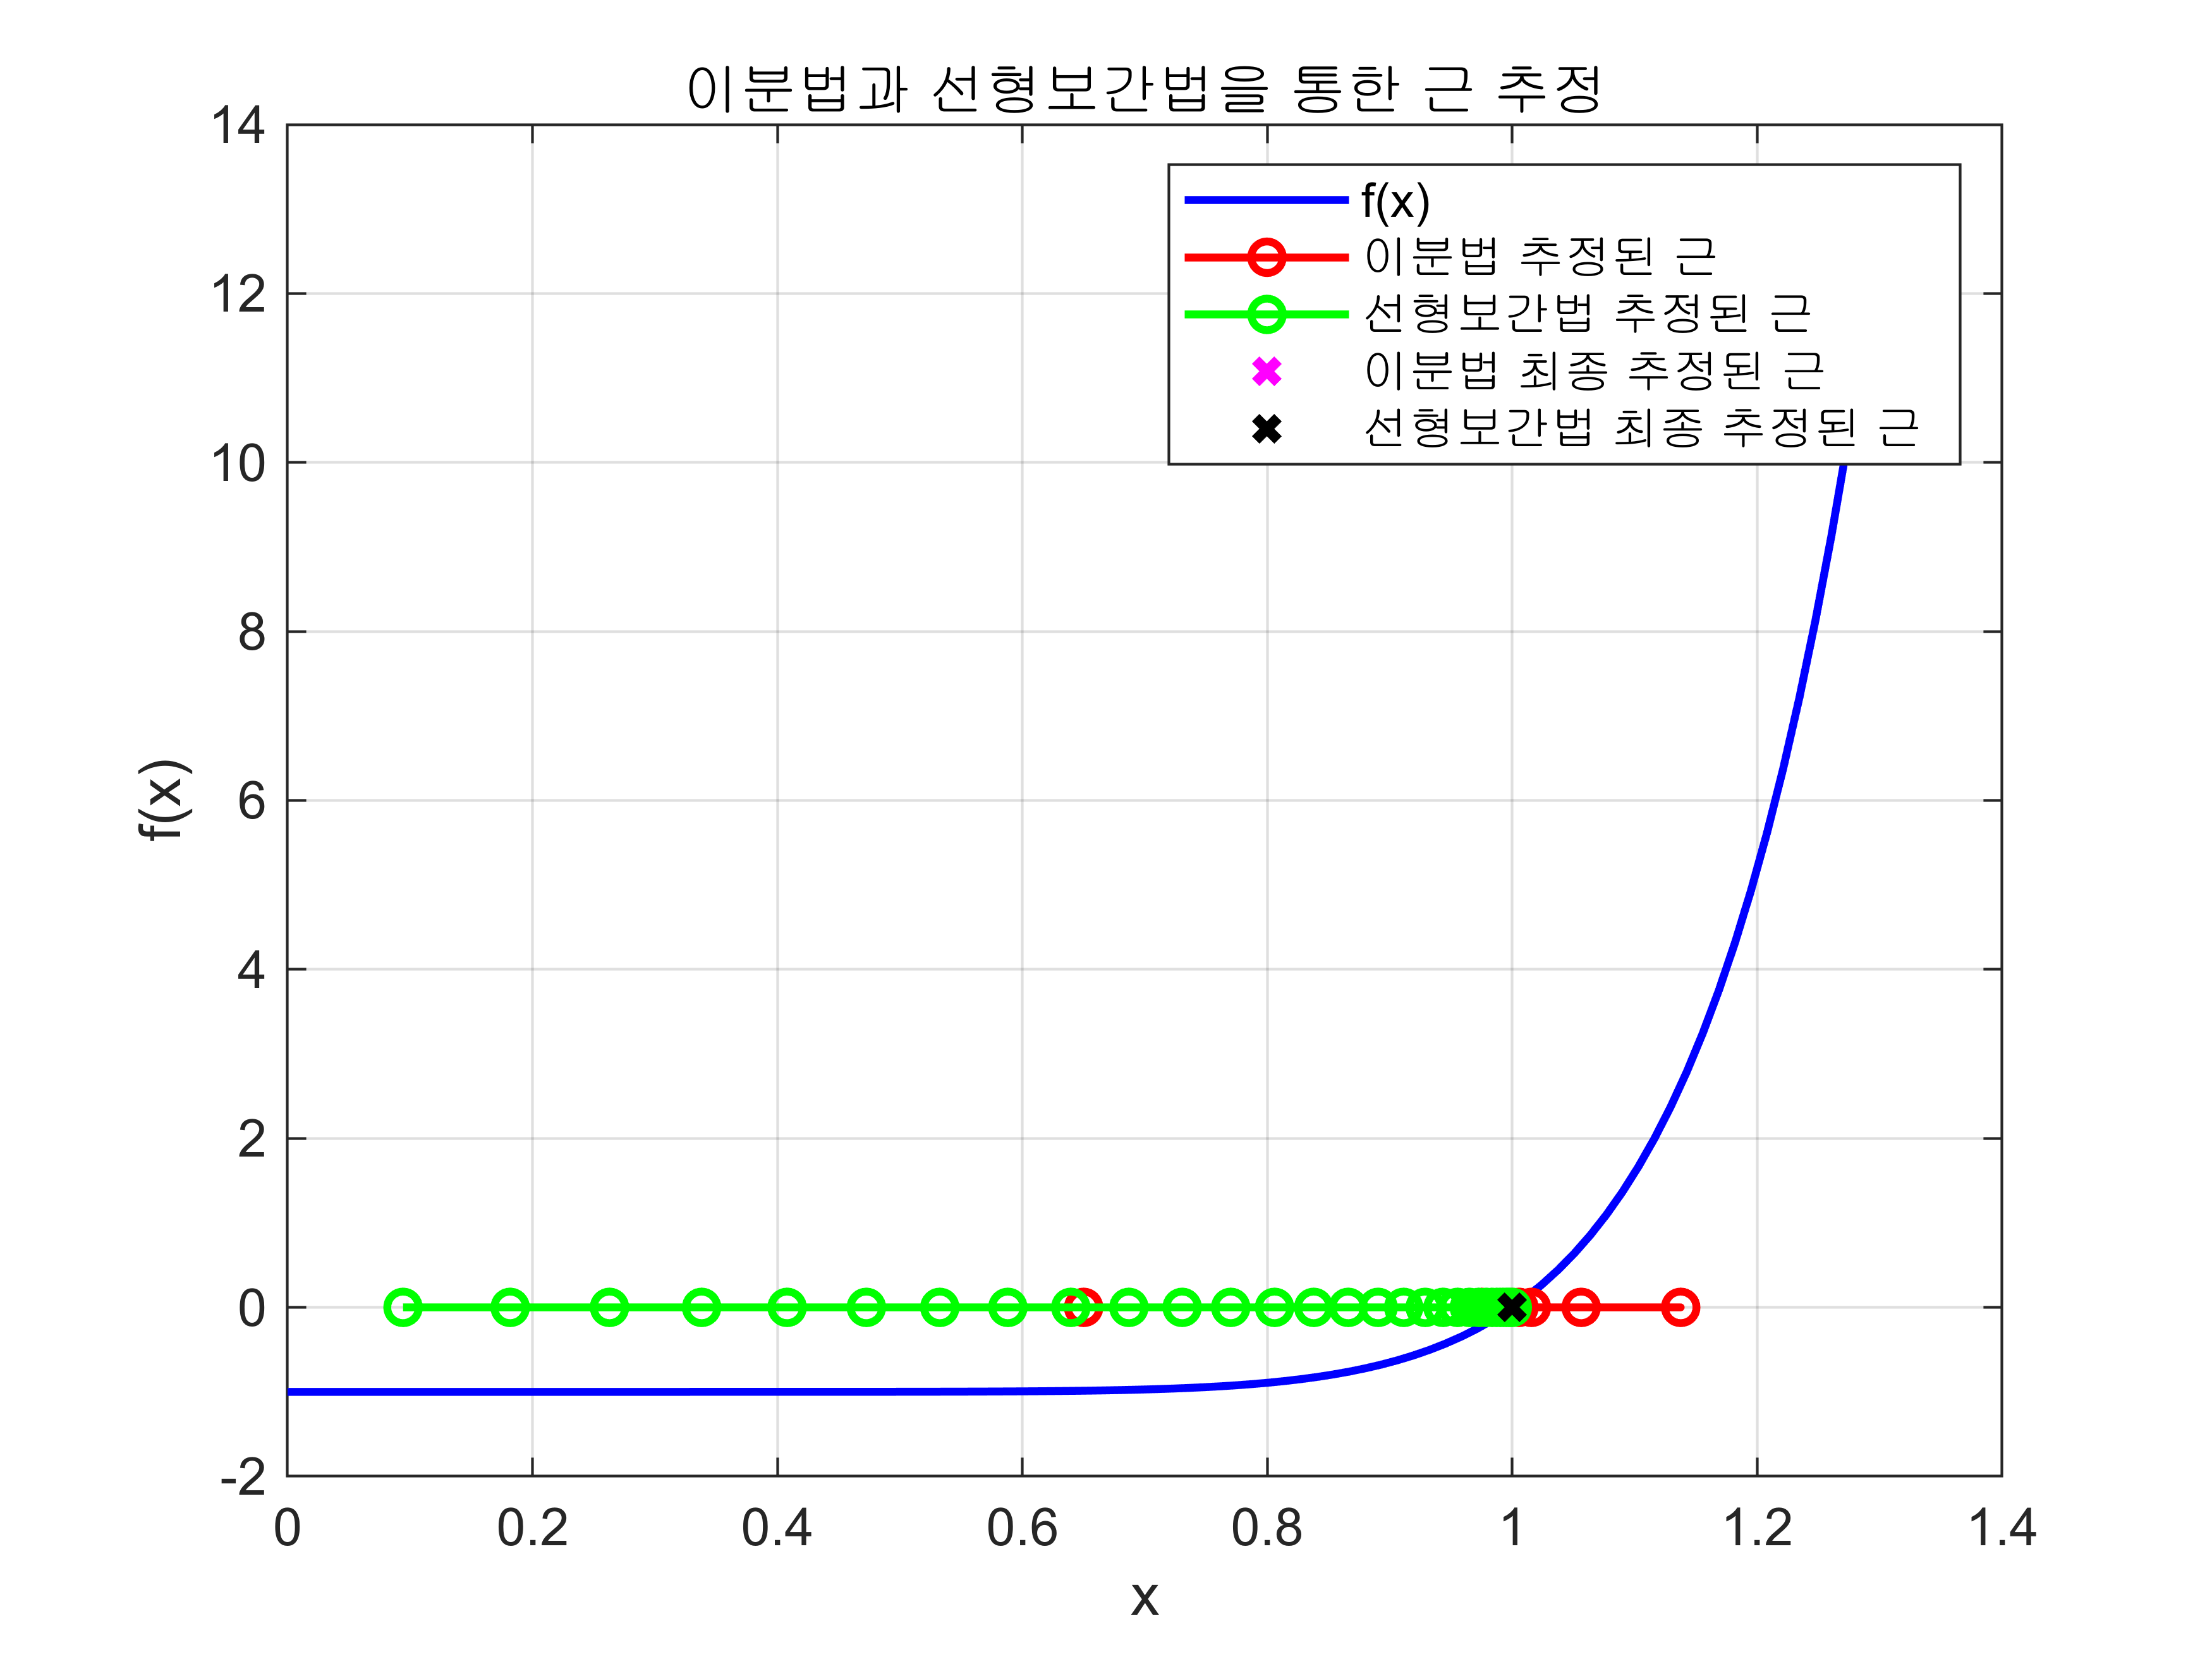

In [16]:

%% 결과 시각화
x_values = linspace(0, 1.3, 100);
f_values = arrayfun(myFunction, x_values);

figure;
plot(x_values, f_values, 'b-', 'LineWidth', 1.5); % 함수 그래프
hold on;
plot(xr_values_bi, zeros(size(xr_values_bi)), 'ro-', 'LineWidth', 1.5); % 이분법 추정된 근
plot(xr_values_lin, zeros(size(xr_values_lin)), 'go-', 'LineWidth', 1.5); % 선형보간법 추정된 근
scatter(xr_values_bi(end), 0, 'mx', 'LineWidth', 2); % 이분법 최종 추정된 근 표시
scatter(xr_values_lin(end), 0, 'kx', 'LineWidth', 2); % 선형보간법 최종 추정된 근 표시
xlabel('x');
ylabel('f(x)');
title('이분법과 선형보간법을 통한 근 추정');
legend('f(x)', '이분법 추정된 근', '선형보간법 추정된 근', '이분법 최종 추정된 근', '선형보간법 최종 추정된 근');
grid on;


-  선형보간법의 문제점 : 수렴속도가 느리다.
-  $\varepsilon_a <\varepsilon_t$ : 가장 큰 문제점
-   **가정** $|f\left(x_l \right)|<|f\left(x_u \right)|$ 이면 $x_l$ 이 $x_u$ 보다 근에 가깝다.( $\left.\Rightarrow \Leftarrow \right)$
-  일방향성 $\Rightarrow$ 곡률이 큰 함수에서 문제발생

In [18]:
function x_new = NAS_2_Bisection(x)
    %% 초기화
    x_true = 1;
    func = @(x) x.*(10) - 1;
    err_s = 0.5e-2;
    x_new = x(1); % 초기 구간을 초기 x_new로 설정
    iter = 0; % 반복 횟수
    xr_values = []; % 추정치 저장을 위한 배열
    error_values = []; % 오차 저장을 위한 배열

    %% 이분법 실행
    while true
        iter = iter + 1;
        f = func(x);

        % 근 교체
        x_old = x_new;
        x_new = mean(x);
        xr_values = [xr_values, x_new]; % 추정치 저장

        err_a = abs((x_new - x_old) / (x_new)); % 상대 오차 계산
        err_t = abs((x_new - x_true) / (x_true)); % 참 상대 오차 계산
        error_values = [error_values, err_a]; % 오차 저장

        f_r = func(x_new);
        if (err_a <= err_s) || (f_r == 0), break; end % 허용 오차 확인

        % 구간 변경
        f = f(1) * f_r;
        if f < 0, x(2) = x_new;
        else, x(1) = x_new; end
    end

    % 결과 출력 및 시각화
    fprintf('최종 추정된 근: %.4f\n', x_new);
    T = table((1:iter)', xr_values', error_values', 'VariableNames', {'Iteration', 'Estimate', 'RelativeError'});
    disp(T);

    c_values = linspace(0, 2, 100);
    v_values = arrayfun(func, c_values);

    figure;
    plot(c_values, v_values, 'b-', 'LineWidth', 1.5); % 함수 그래프
    hold on;
    plot(xr_values, zeros(size(xr_values)), 'ro-', 'LineWidth', 1.5); % 추정된 근
    scatter(xr_values(end), 0, 'gx', 'LineWidth', 2); % 최종 추정된 근 표시
    text(xr_values(end), 0.1, sprintf('%.4f', xr_values(end)), 'Color', 'green', 'FontSize', 10); % 근 값 표시
    xlabel('x');
    ylabel('f(x)');
    title('이분법을 통한 근 추정');
    legend('f(x)', '추정된 근', '최종 추정된 근');
    grid on;
end


In [19]:
function x_new = NAS_2_LinearInterpolation(x)
    %% 초기화
    x_true = 1;
    func = @(x) x.*(10) - 1;
    err_s = 0.5e-2;
    x_new = x(1); % 초기 구간을 초기 x_new로 설정
    iter = 0; % 반복 횟수
    xr_values = []; % 추정치 저장을 위한 배열
    error_values = []; % 오차 저장을 위한 배열

    %% 선형보간법 실행
    while true
        iter = iter + 1;
        f = func(x);

        % 근 교체
        x_old = x_new;
        x_new = x(2) - (f(2) * (x(1) - x(2))) / (f(1) - f(2));
        xr_values = [xr_values, x_new]; % 추정치 저장

        err_a = abs((x_new - x_old) / (x_new)); % 상대 오차 계산
        err_t = abs((x_new - x_true) / (x_true)); % 참 상대 오차 계산
        error_values = [error_values, err_a]; % 오차 저장

        f_r = func(x_new);
        if (err_a <= err_s) || (f_r == 0), break; end % 허용 오차 확인

        % 구간 변경
        f = f(1) * f_r;
        if f < 0, x(2) = x_new;
        else, x(1) = x_new; end
    end

    % 결과 출력 및 시각화
    fprintf('최종 추정된 근: %.4f\n', x_new);
    T = table((1:iter)', xr_values', error_values', 'VariableNames', {'Iteration', 'Estimate', 'RelativeError'});
    disp(T);

    c_values = linspace(0, 2, 100);
    v_values = arrayfun(func, c_values);

    figure;
    plot(c_values, v_values, 'b-', 'LineWidth', 1.5); % 함수 그래프
    hold on;
    plot(xr_values, zeros(size(xr_values)), 'ro-', 'LineWidth', 1.5); % 추정된 근
    scatter(xr_values(end), 0, 'gx', 'LineWidth', 2); % 최종 추정된 근 표시
    text(xr_values(end), 0.1, sprintf('%.4f', xr_values(end)), 'Color', 'green', 'FontSize', 10); % 근 값 표시
    xlabel('x');
    ylabel('f(x)');
    title('선형 보간법을 통한 근 추정');
    legend('f(x)', '추정된 근', '최종 추정된 근');
    grid on;
end




In [20]:
function [xr, iter, ea] = ModFalsePos(x1, xu, es, max_iter)
    % 초기 변수 설정
    iter = 0;
    xr_old = x1;  % 초기 근
    ea = 100;     % 초기 상대 오차
    f_1 = f(x1);  % 왼쪽 끝점 값
    f_u = f(xu);  % 오른쪽 끝점 값
    xr_values = []; % 추정치 저장을 위한 배열
    error_values = []; % 오차 저장을 위한 배열

    while true
        % 새 근 찾기
        xr = xu - f_u * (x1 - xu) / (f_1 - f_u);
        xr_values = [xr_values, xr]; % 추정치 저장

        % 오차 계산
        if xr ~= 0
            ea = abs((xr - xr_old) / xr) * 100;
        end
        error_values = [error_values, ea]; % 오차 저장
        xr_old = xr;

        % 함수 평가 및 반복 횟수 증가
        f_r = f(xr);

        % 근 갱신 및 경계 업데이트
        test = f_1 * f_r;
        if test < 0
            xu = xr;
            f_u = f_r;
        elseif test > 0
            x1 = xr;
            f_1 = f_r;
        else
            ea = 0;
        end

        % 반복 횟수 증가
        iter = iter + 1;

        % 종료 조건
        if ea <= es || iter >= max_iter
            break;
        end
    end

    % 결과 출력 및 시각화
    fprintf('최종 추정된 근: %.4f\n', xr);
    T = table((1:iter)', xr_values', error_values', 'VariableNames', {'Iteration', 'Estimate', 'RelativeError'});
    disp(T);

    c_values = linspace(0, 2, 100);
    v_values = arrayfun(@f, c_values);

    figure;
    plot(c_values, v_values, 'b-', 'LineWidth', 1.5); % 함수 그래프
    hold on;
    plot(xr_values, zeros(size(xr_values)), 'ro-', 'LineWidth', 1.5); % 추정된 근
    scatter(xr_values(end), 0, 'gx', 'LineWidth', 2); % 최종 추정된 근 표시
    text(xr_values(end), 0.1, sprintf('%.4f', xr_values(end)), 'Color', 'green', 'FontSize', 10); % 근 값 표시
    xlabel('x');
    ylabel('f(x)');
    title('수정된 False Position 방법을 통한 근 추정');
    legend('f(x)', '추정된 근', '최종 추정된 근');
    grid on;
end

% 예제 함수 정의
function y = f(x)
    y = x * 10 - 1; % 예제 함수
end



최종 추정된 근: 0.1001
    Iteration    Estimate    RelativeError
    _________    ________    _____________
        1               1              1  
        2             0.5              1  
        3            0.25              1  
        4           0.125              1  
        5          0.0625              1  
        6         0.09375        0.33333  
        7         0.10938        0.14286  
        8         0.10156       0.076923  
        9        0.097656           0.04  
       10        0.099609       0.019608  
       11         0.10059      0.0097087  
       12          0.1001       0.004878


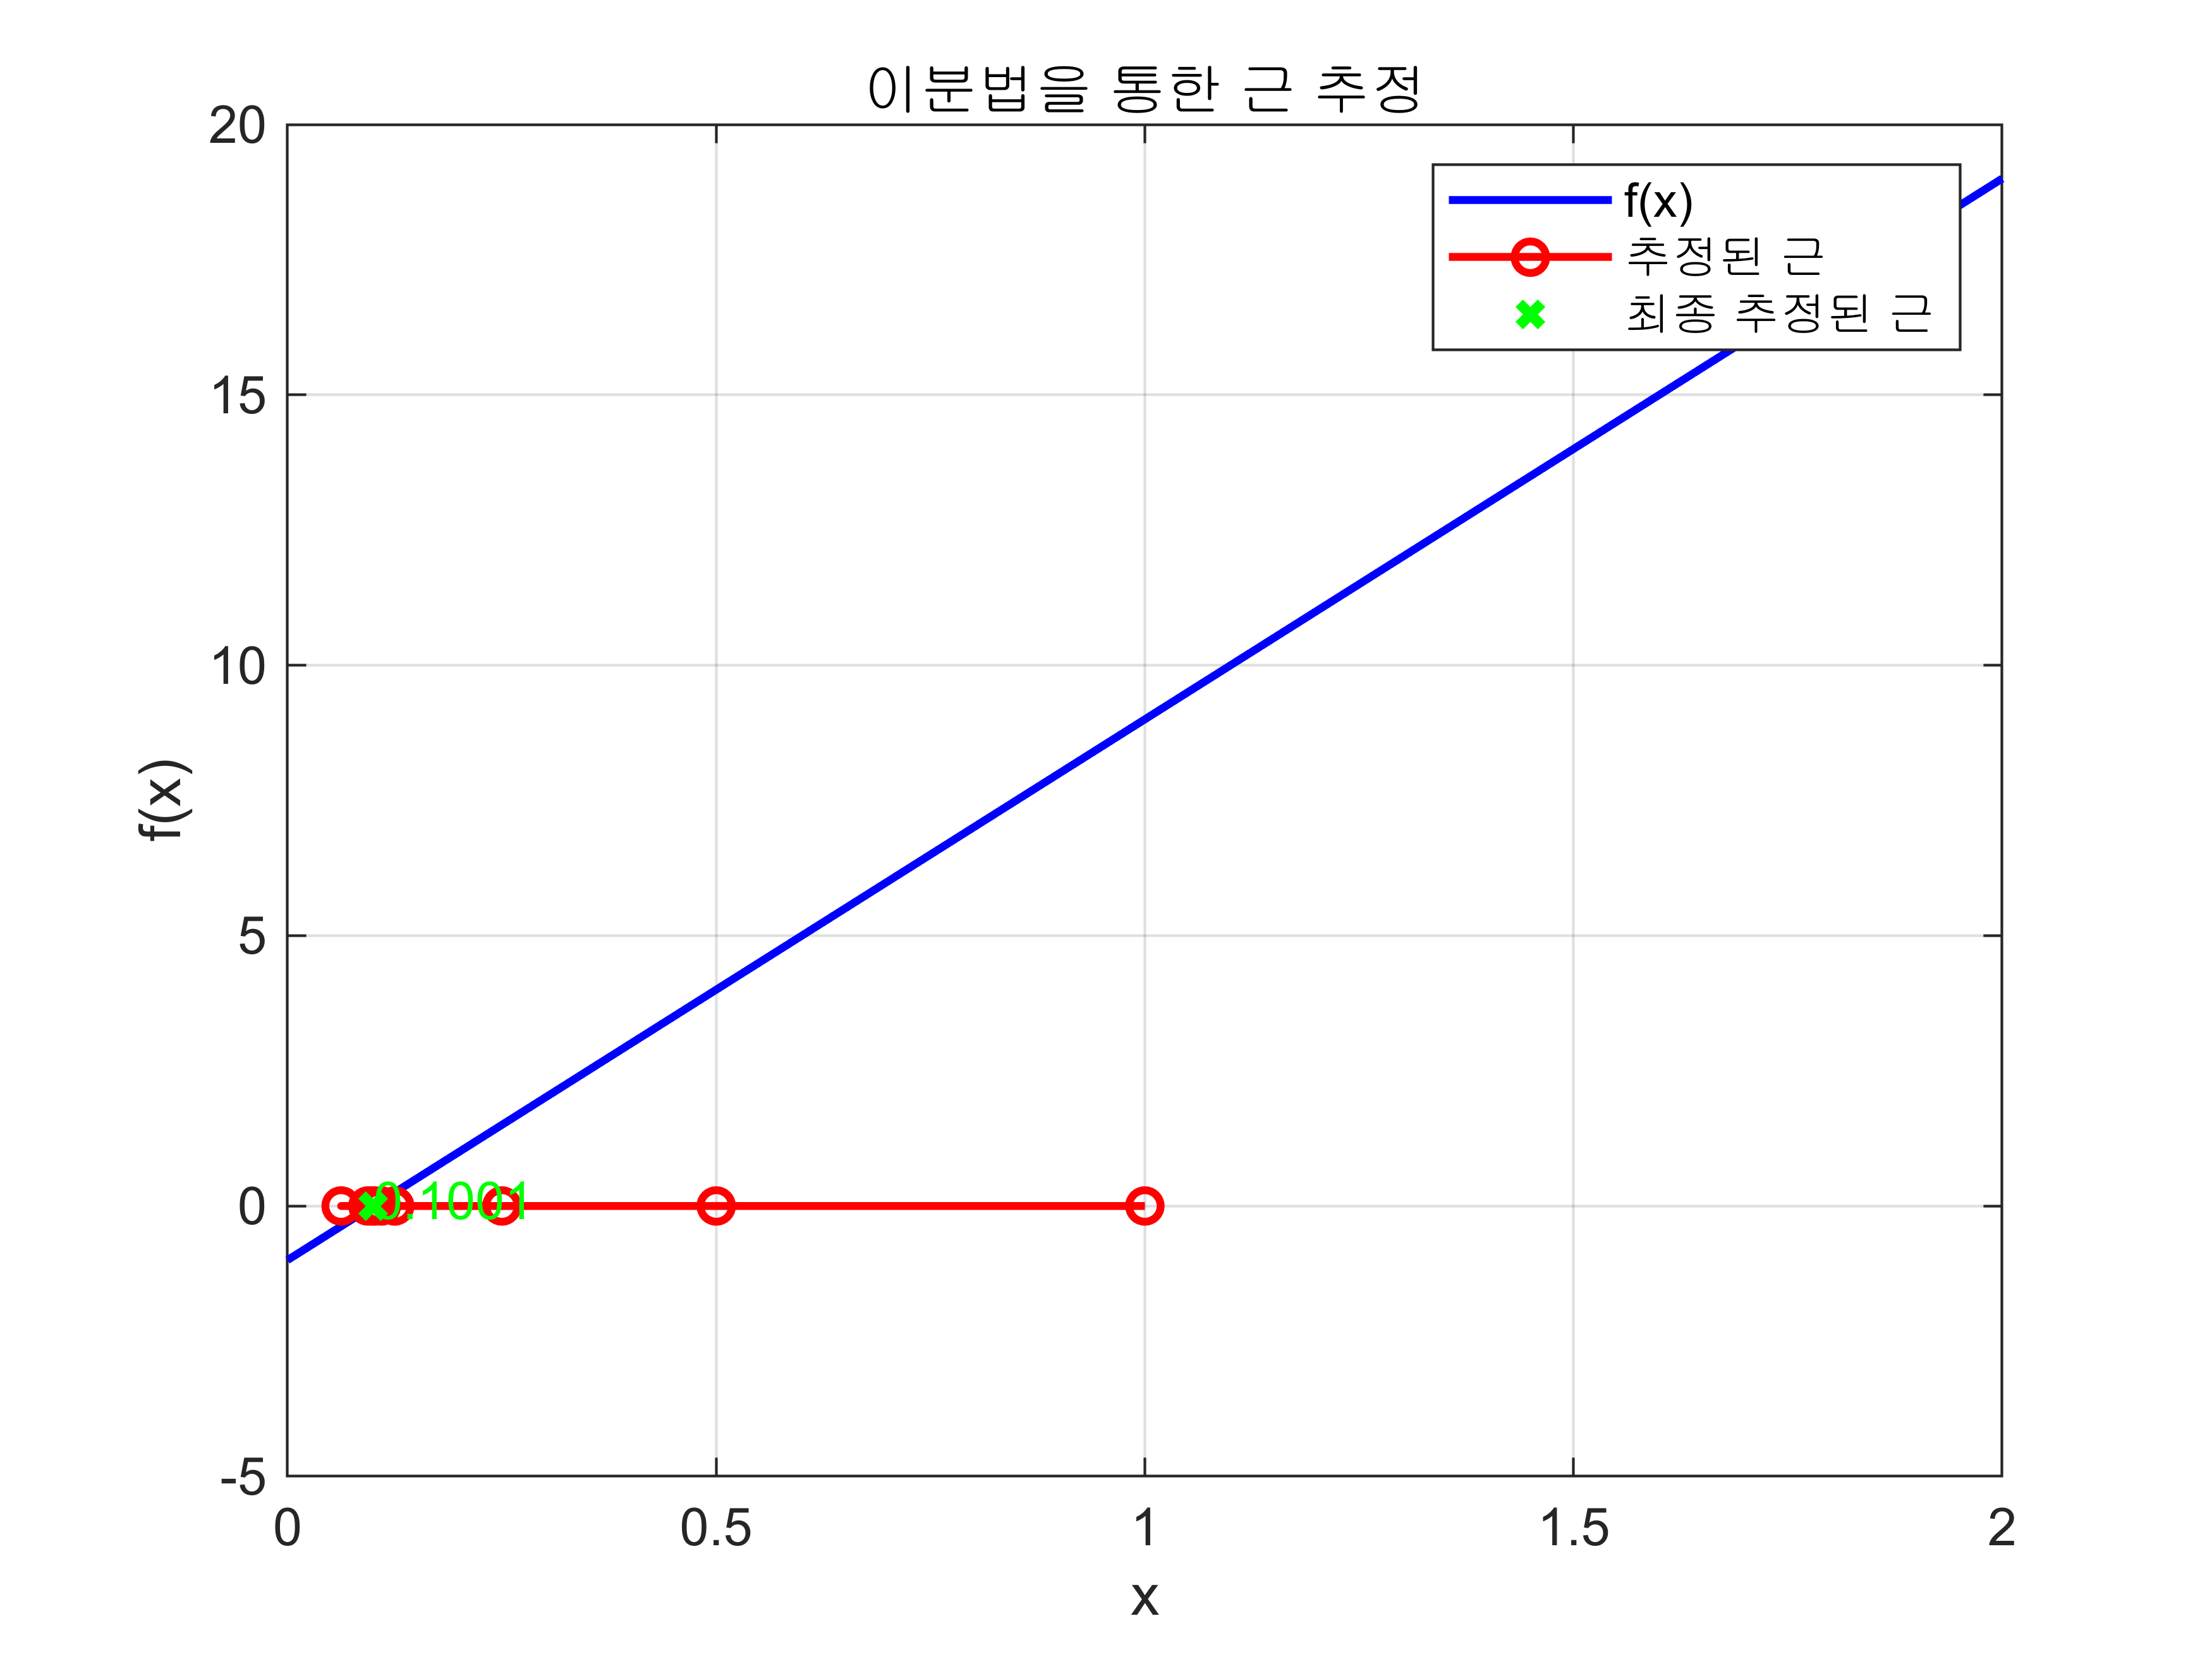

In [21]:
% 이분법 실행 및 시각화
NAS_2_Bisection([0, 2]);

최종 추정된 근: 0.1000
    Iteration    Estimate    RelativeError
    _________    ________    _____________
        1          0.1                 1  
        2          0.1        8.3267e-16


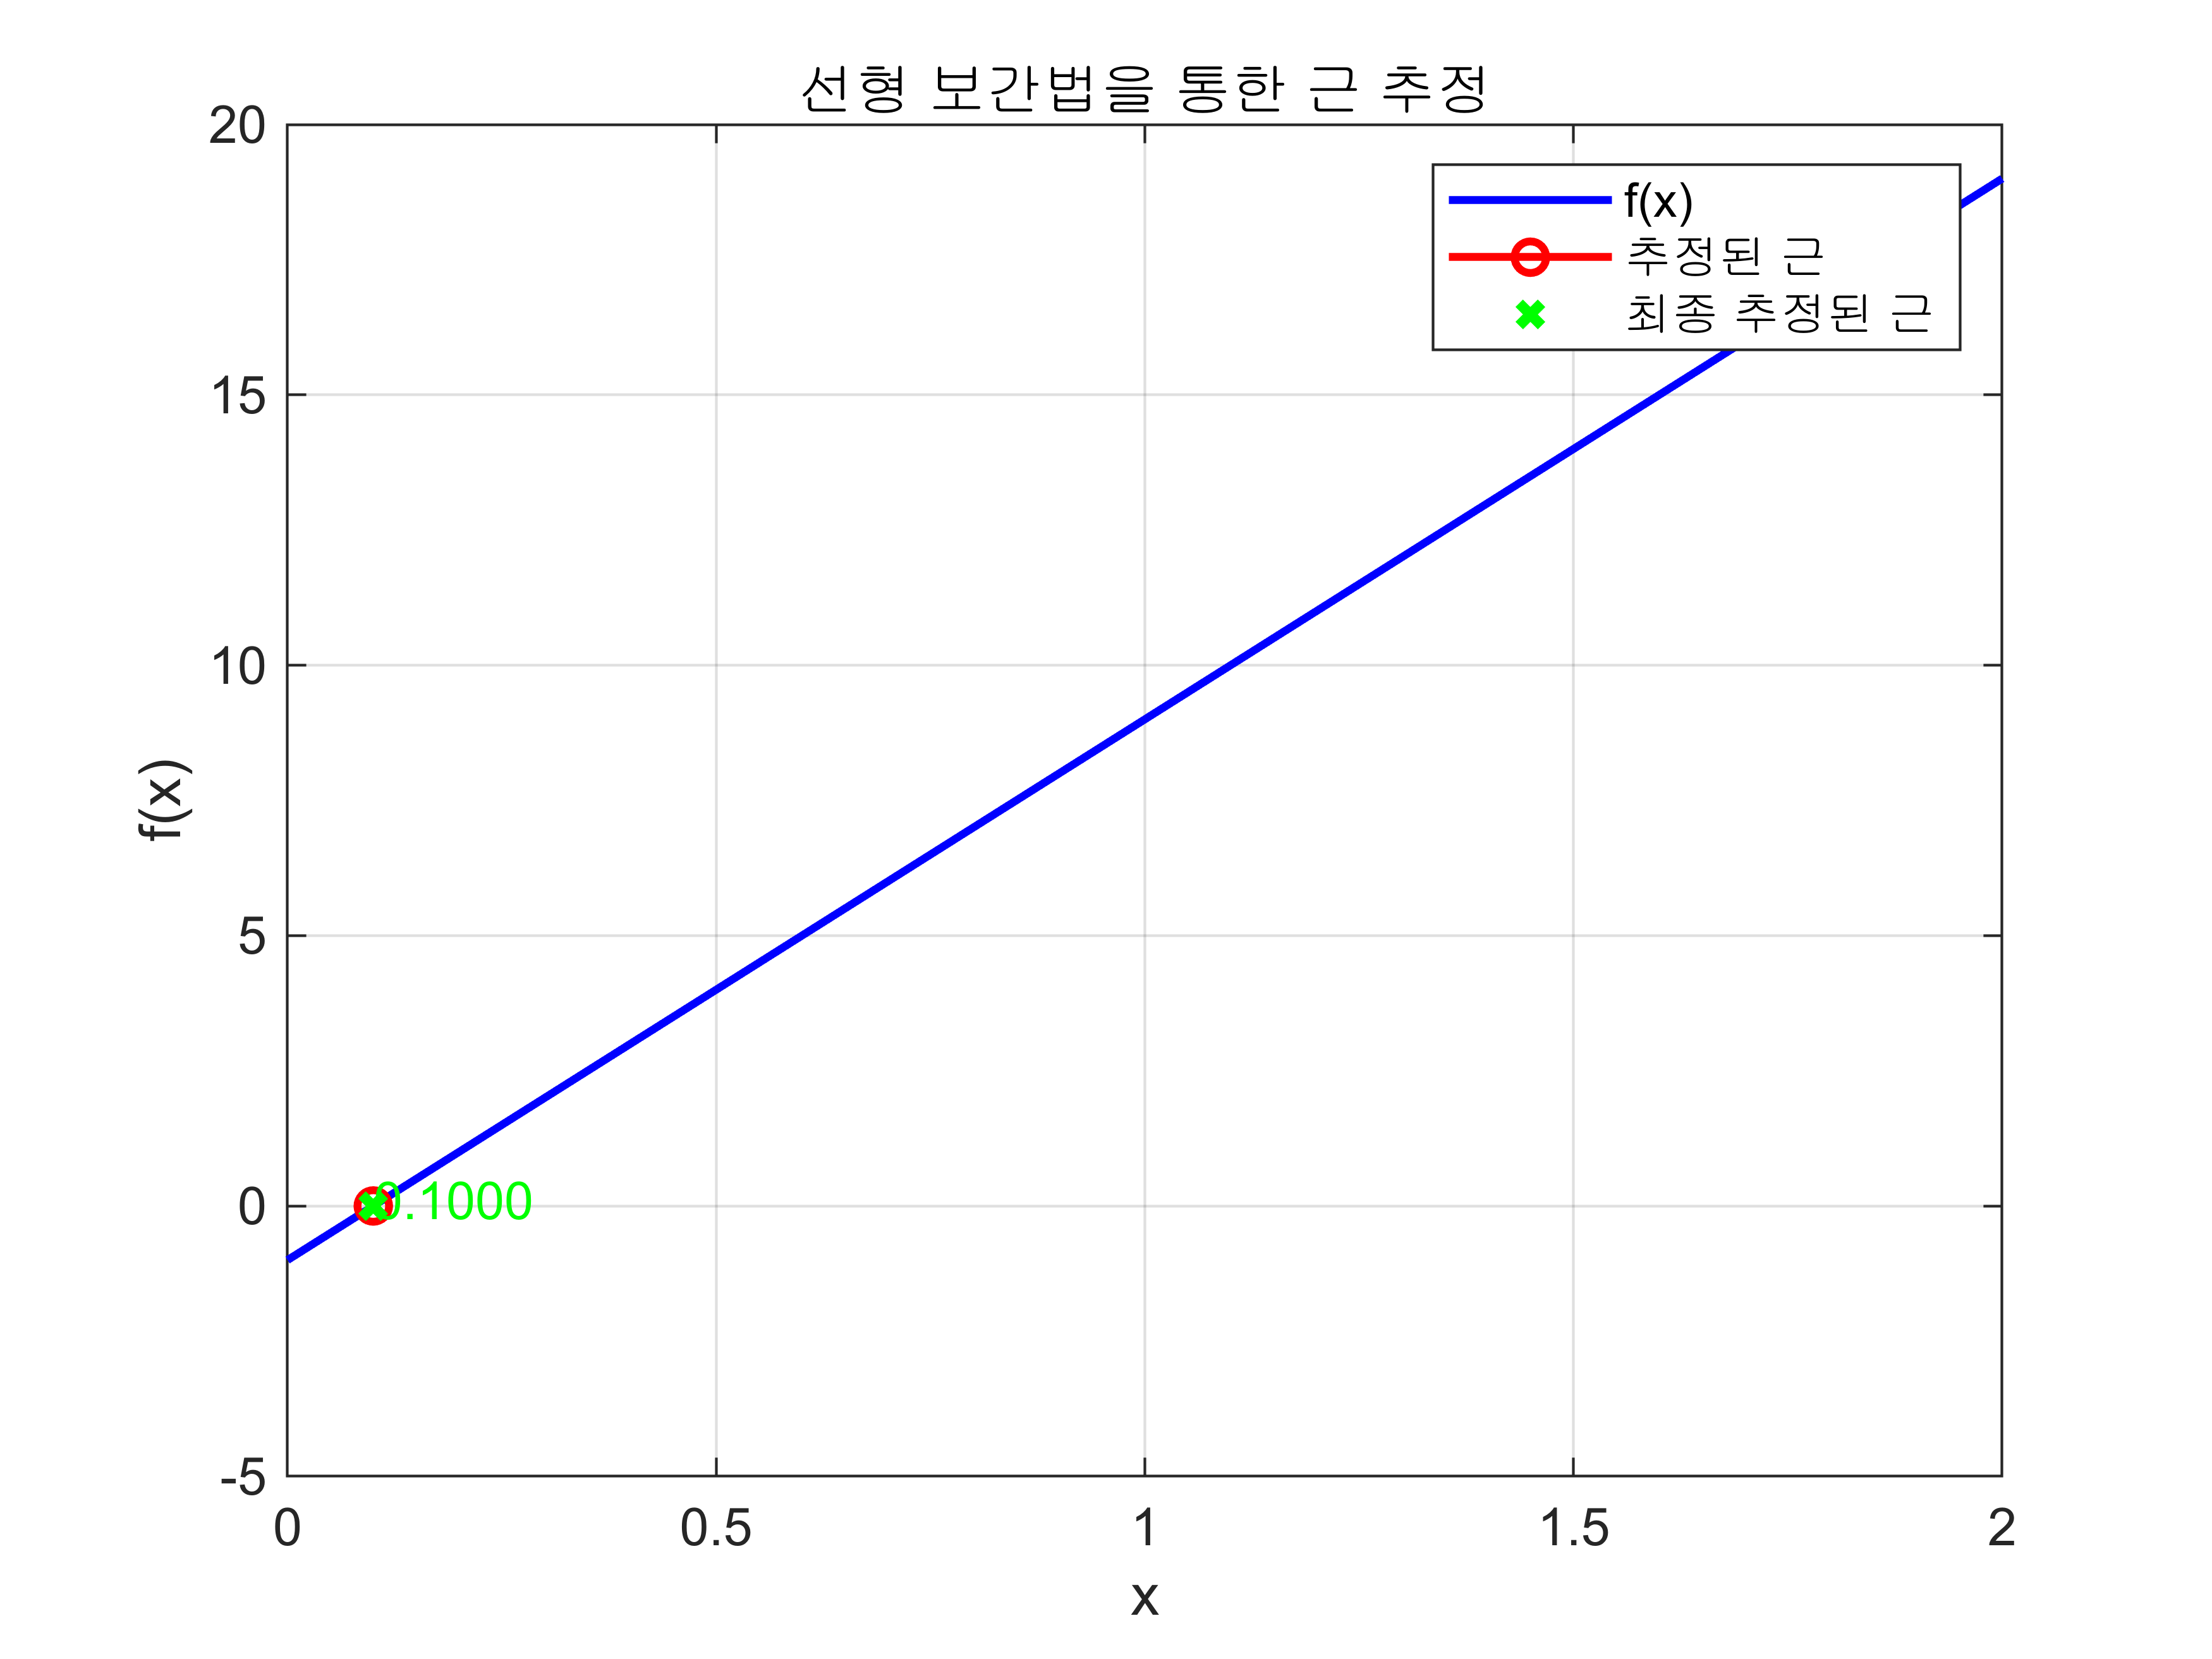

In [22]:

% 선형 보간법 실행 및 시각화
NAS_2_LinearInterpolation([0, 2]);

최종 추정된 근: 0.1000
    Iteration    Estimate    RelativeError
    _________    ________    _____________
        1          0.1               100  
        2          0.1        8.3267e-14


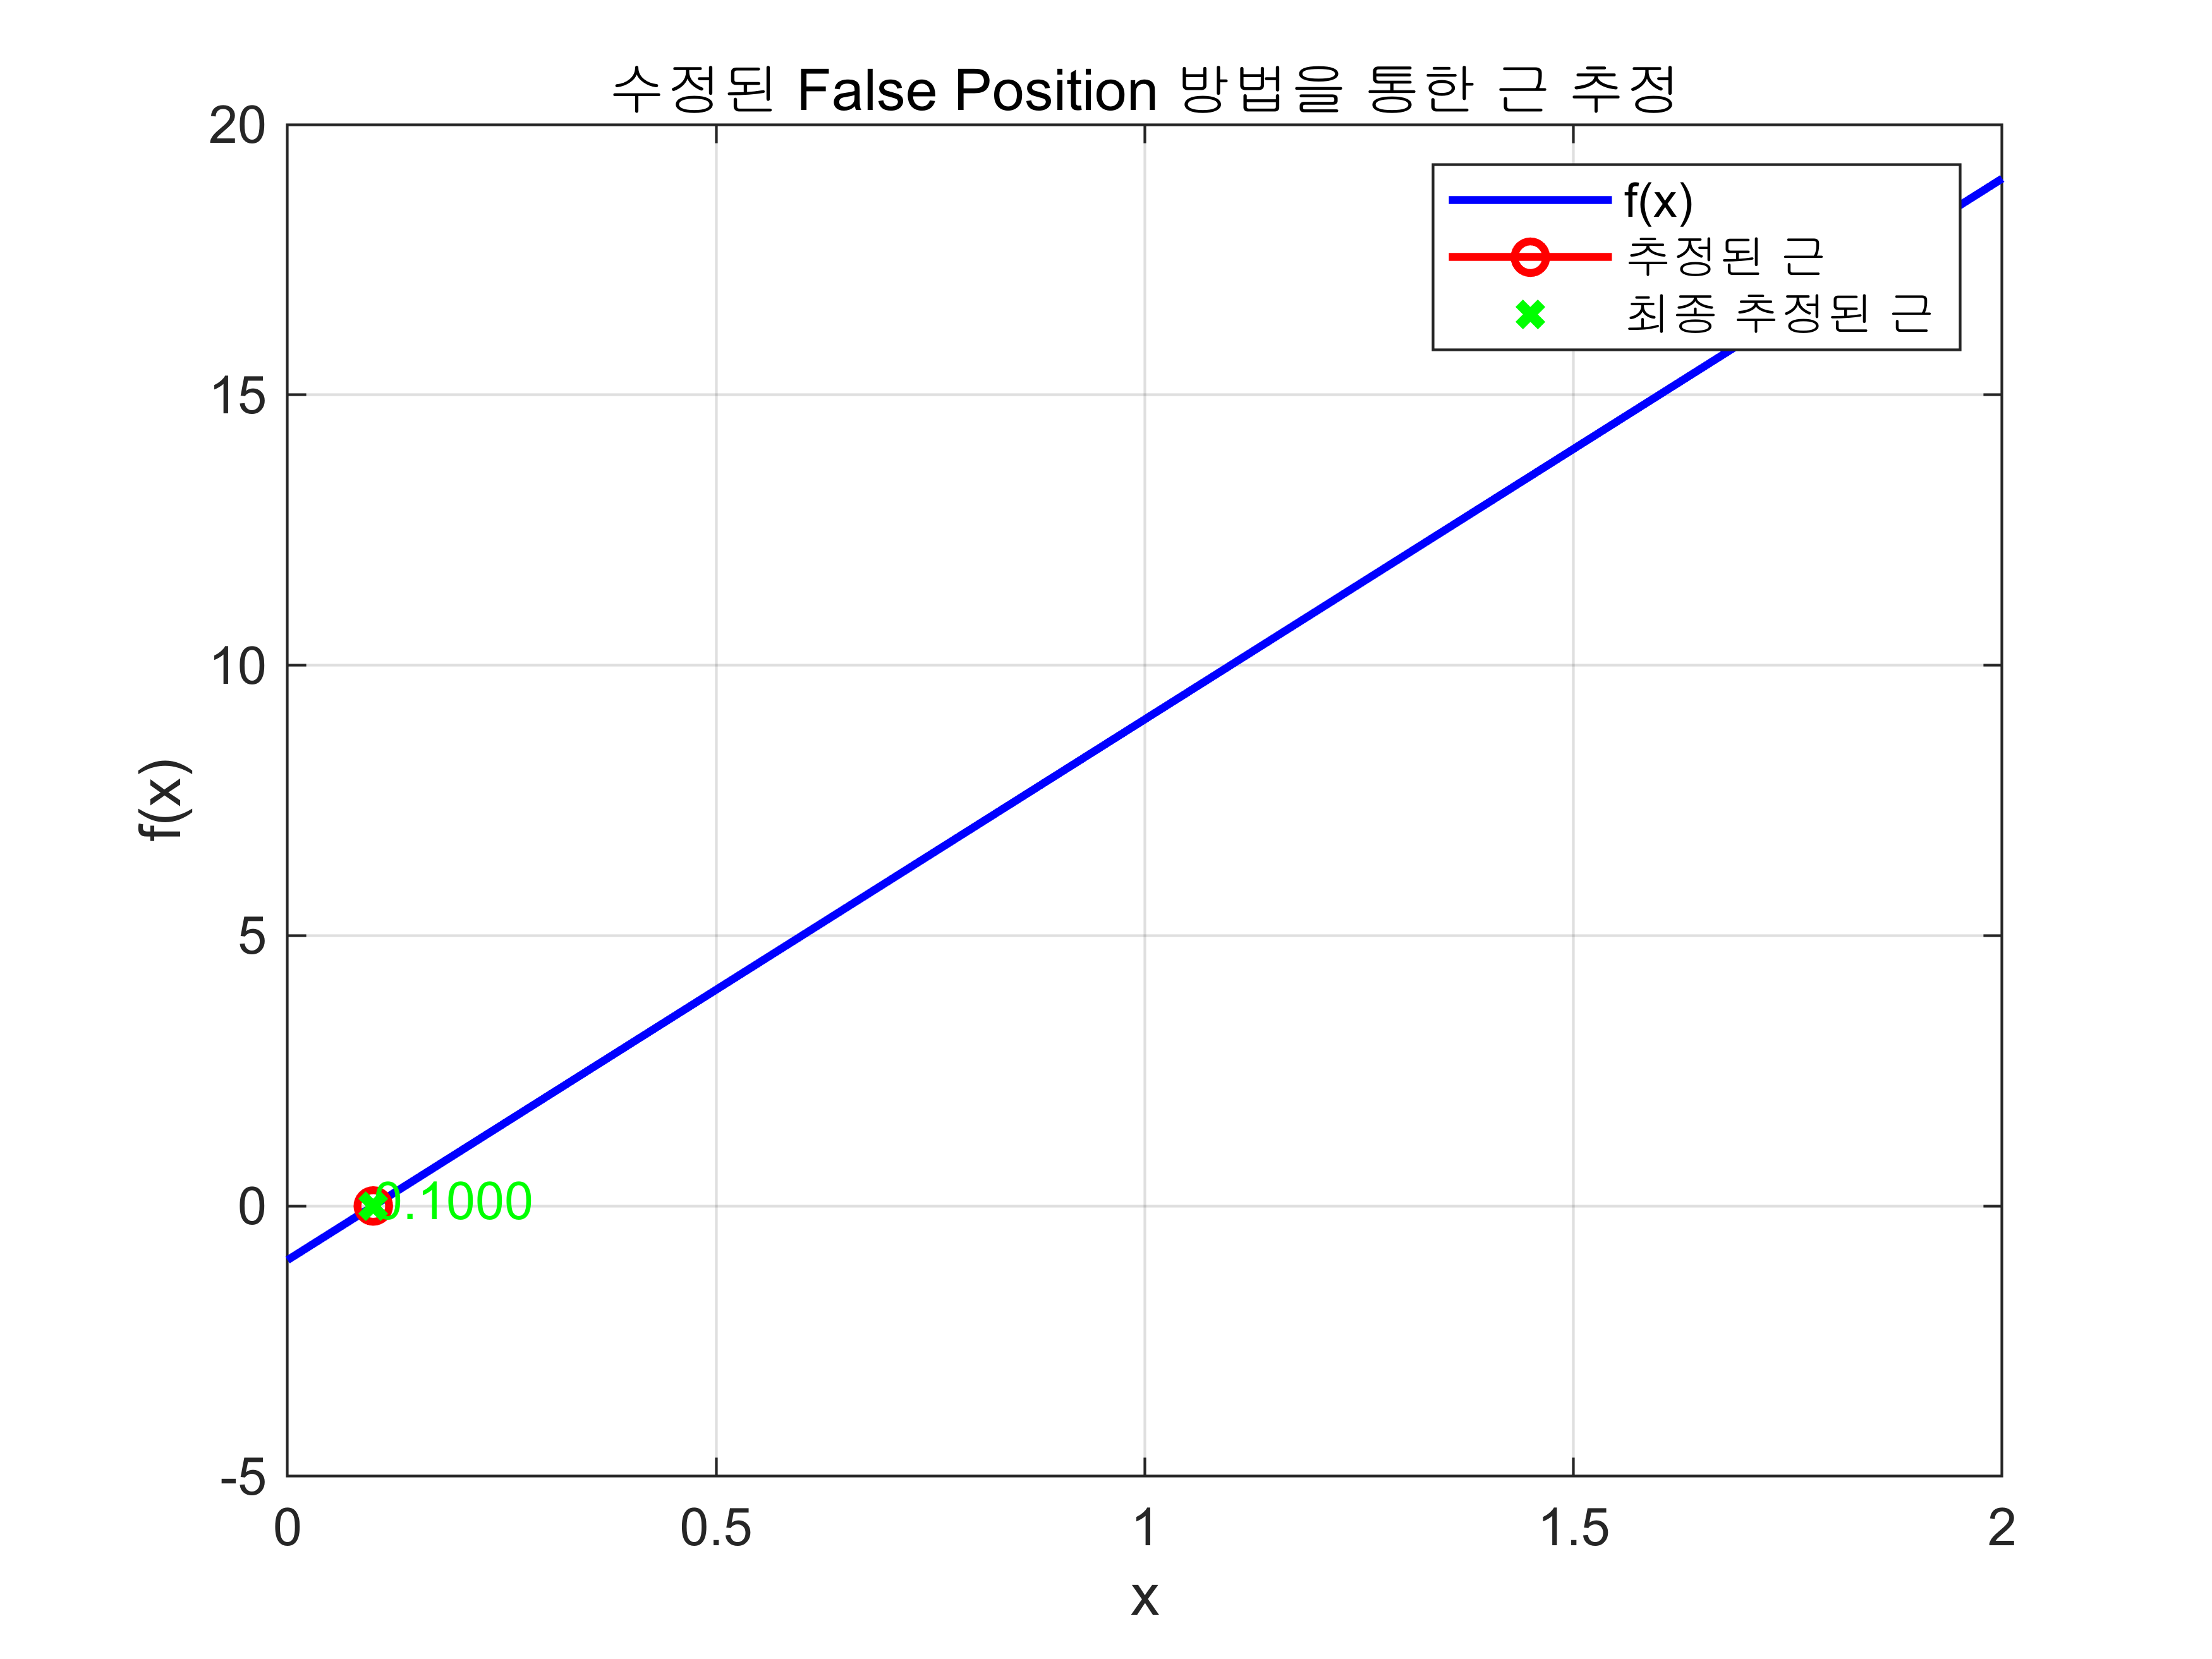

In [23]:

% 수정된 False Position 방법 실행 및 시각화
ModFalsePos(0, 2, 0.5e-2, 100);